In [54]:
# import packages
import pandas as pd
import numpy as np
# import the libraries
import datetime


import seaborn as sns # import seaborn for visualization of data
%matplotlib inline
import matplotlib.pyplot as plt#
import matplotlib as mpl
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# Import libraries and make plots shine!
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
# Set figure size to (14,6)
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.rcParams['figure.figsize'] = (14,6)


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title

In [55]:
#import data csv

df = pd.read_csv('LTOTALNSA.csv', sep = ',',index_col='DATE',parse_dates = True)
df

,LTOTALNSA
DATE,
1976-01-01,864.600
1976-02-01,973.300
1976-03-01,1216.100
1976-04-01,1163.200
1976-05-01,1176.100
...,...
2021-11-01,1014.411
2021-12-01,1203.993
2022-01-01,989.560


In [56]:
# data exploration
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 1976-01-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LTOTALNSA  555 non-null    float64
dtypes: float64(1)
memory usage: 8.7 KB


In [57]:
df.columns

Index(['LTOTALNSA'], dtype='object')

In [58]:
# Rename the column to make it more practical
df.rename(columns = {'LTOTALNSA' : 'sales'},inplace = True)

In [59]:
# See if data have missing values etc.
print(f'There are {df.isna().sum()[0]} missing values and {df.isnull().sum()[0]} zero values')

There are 0 missing values and 0 zero values


In [60]:
# Resample the data and explore them!
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['timestep'] = list(range(len(df)))
df.head(5)

,sales,month,year,day,timestep
DATE,,,,,
1976-01-01,864.6,1,1976,1,0
1976-02-01,973.3,2,1976,1,1
1976-03-01,1216.1,3,1976,1,2
1976-04-01,1163.2,4,1976,1,3
1976-05-01,1176.1,5,1976,1,4


In [61]:
# Or we can create new Frames with respect to datetime:
quarterly_aver = df.resample(rule = 'Q').mean()
quarterly_aver

,sales,month,year,day,timestep
DATE,,,,,
1976-03-31,1018.000000,2,1976,1,1
1976-06-30,1188.066667,5,1976,1,4
1976-09-30,1049.966667,8,1976,1,7
1976-12-31,1067.233333,11,1976,1,10
1977-03-31,1141.466667,2,1977,1,13
...,...,...,...,...,...
2021-03-31,1299.071333,2,2021,1,541
2021-06-30,1463.647000,5,2021,1,544
2021-09-30,1129.799667,8,2021,1,547


In [62]:
# shift data 
df_shift = df.copy()
df_shift['shift1'] = df_shift['sales'].shift(1)
df_shift['shift2'] = df_shift['sales'].shift(2)
df_shift

,sales,month,year,day,timestep,shift1,shift2
DATE,,,,,,,
1976-01-01,864.600,1,1976,1,0,NaN,NaN
1976-02-01,973.300,2,1976,1,1,864.600,NaN
1976-03-01,1216.100,3,1976,1,2,973.300,864.600
1976-04-01,1163.200,4,1976,1,3,1216.100,973.300
1976-05-01,1176.100,5,1976,1,4,1163.200,1216.100
...,...,...,...,...,...,...,...
2021-11-01,1014.411,11,2021,1,550,1051.015,1015.935
2021-12-01,1203.993,12,2021,1,551,1014.411,1051.015
2022-01-01,989.560,1,2022,1,552,1203.993,1014.411


- Have a look of the data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


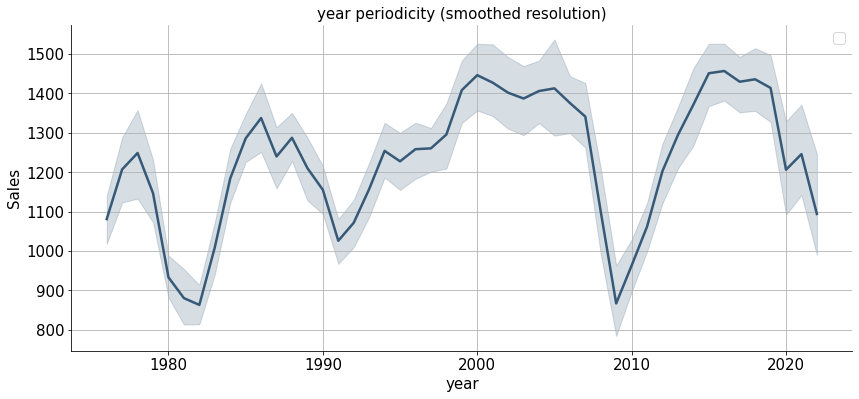

In [67]:
ax =sns.lineplot(x = df['year'], y =df['sales'])
#plt.xlim(1000, 3000)
ax.set_title("year periodicity (smoothed resolution)")
ax.set_xlabel("year")
ax.set_ylabel("Sales")
ax.grid(True)
ax.legend(loc=1)
#fig.savefig('Basic.png', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


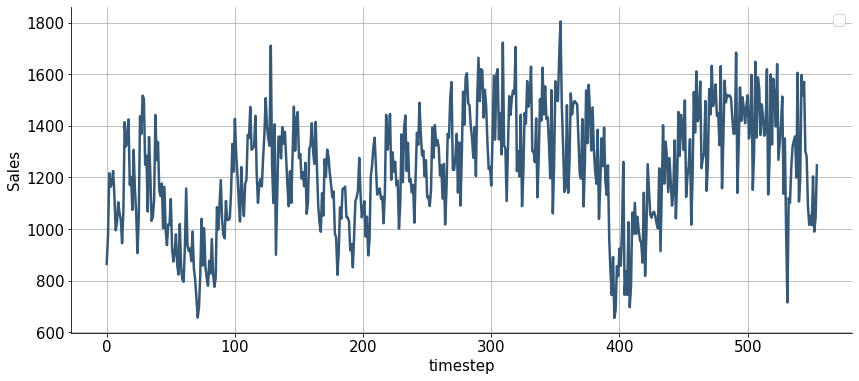

In [65]:
ax = sns.lineplot(x = df['timestep'], y =df['sales'])
#plt.xlim(1000, 3000)
ax.set_title("timestep periodicity (high resolution)")
ax.set_xlabel("timestep")
ax.set_ylabel("Sales")
ax.grid(True)
ax.legend(loc=1)
#fig.savefig('Basic.png', dpi=300)

<AxesSubplot:xlabel='month', ylabel='weight'>

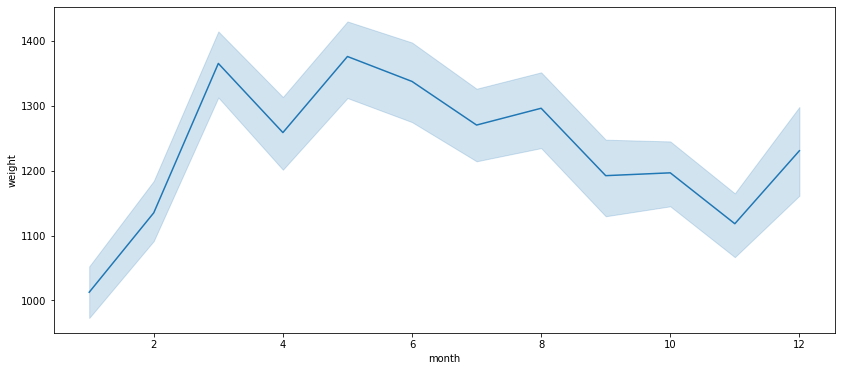

In [33]:
sns.lineplot(x = df['month'], y =df['weight'])
#plt.xlim(1000, 3000)